### RDKit visualization example

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

In [2]:
ritonavir_smiles_string = 'CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O'
ritonavir_molecule = Chem.MolFromSmiles(ritonavir_smiles_string)

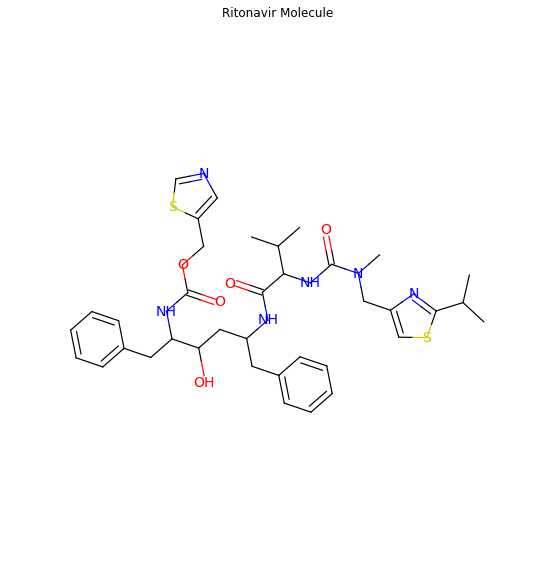

In [3]:
fig = Draw.MolToMPL(ritonavir_molecule)
plt.title('Ritonavir Molecule')
plt.axis('off')
plt.show()

### Reading training data from tsv file

In [4]:
import numpy as np
import pandas as pd

# train_p53 = pd.read_csv('sr-p53.smiles',
#                           sep='\t',
#                           names=['smiles', 'id', 'target'])

train_p53 = pd.read_csv('SR-p53_train.txt', sep='\s+', names=['smiles', 'target'])

In [5]:
train_p53.head()

,smiles,target
0,CCN1C(=CC=Cc2sc3ccccc3[n+]2CC)Sc2ccccc21.[I-],1
1,COC(=O)C[C@](O)(CCCC(C)(C)O)C(=O)O[C@@H]1C(OC)...,1
2,Cc1cccc(C)c1OCC(C)N.Cl,0
3,CO.COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC...,1
4,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)...,0


In [6]:
sml = train_p53.smiles[0]

In [7]:
example_smile = Chem.MolFromSmiles(sml)

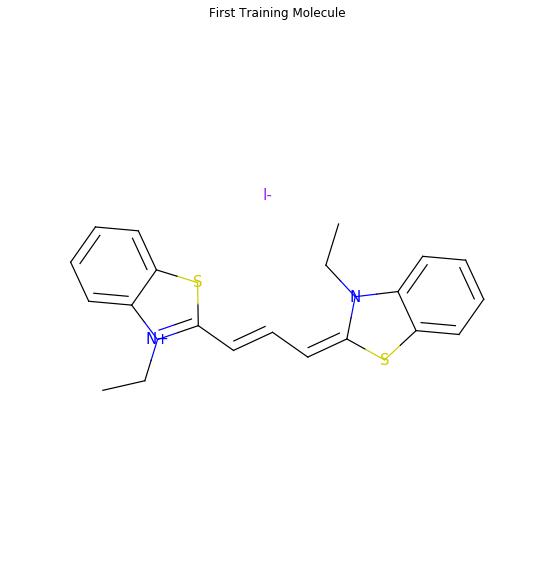

In [8]:
fig = Draw.MolToMPL(example_smile)
plt.title('First Training Molecule')
plt.axis('off')
plt.show()

## Generating plots for blog post 1

***Want random examples, long and short examples, ring examples***

In [9]:
# five random smiles
random_smiles = train_p53.sample(n=5)

In [10]:
random_smiles.smiles

1106    CN1CCC[C@@H]1CCO[C@](C)(c1ccccc1)c1ccc(Cl)cc1....
3702                                    Oc1ccc(Cl)c(Cl)c1
1890                   CCCCCCCCCCCCCCOS(=O)(=O)[O-].[Na+]
4818                                      CC(O)COc1ccccc1
7156                                         C=C(C)C(=O)O
Name: smiles, dtype: object

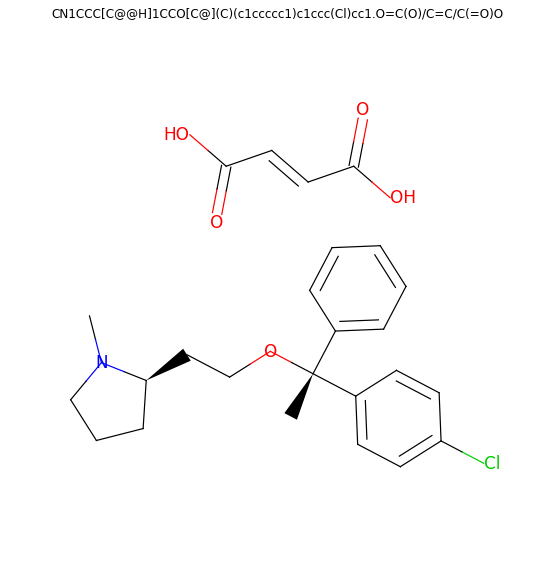

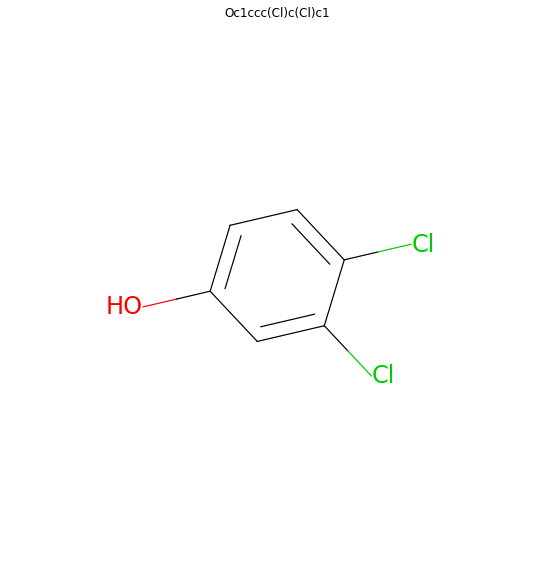

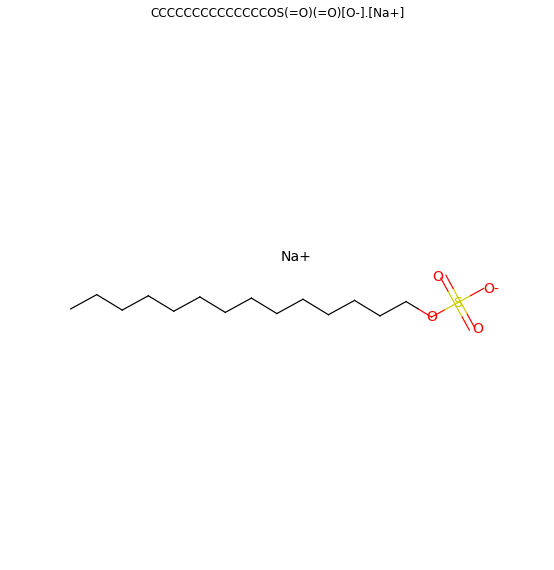

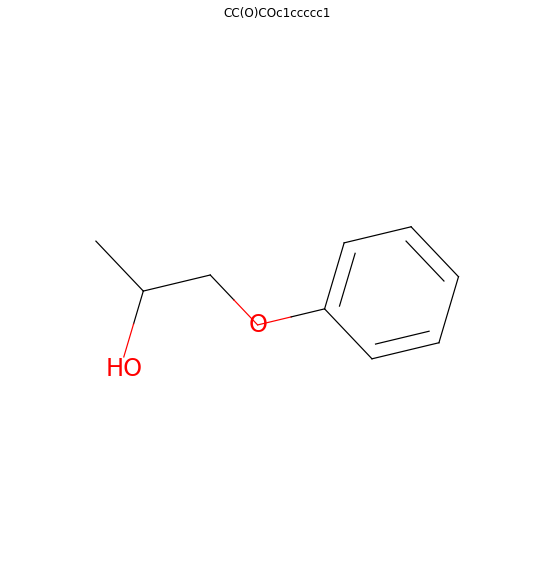

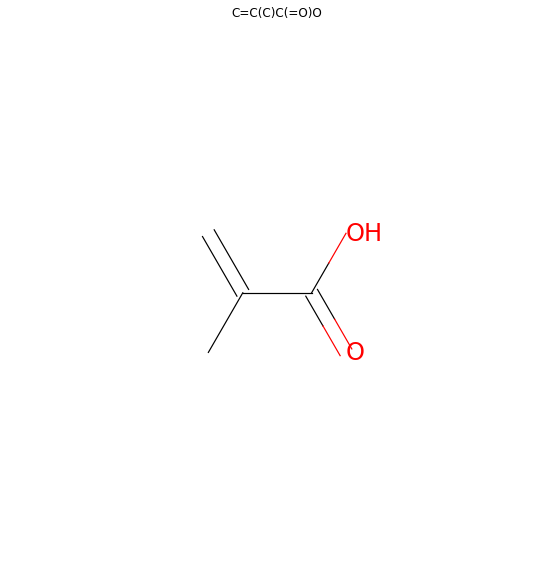

In [11]:
for sml in random_smiles.smiles:
    print_smile = Chem.MolFromSmiles(sml)
    fig = Draw.MolToMPL(print_smile)
    plt.title(sml)
    plt.axis('off')
#     fig.savefig(sml+'_example.png', dpi=300)
    plt.show()

## Creating directory of training SMILES images as tf tensors
***Part 2 of the project is going to be trying to apply a CNN to these images (and then step three will be combining the learned image embeddings with the RNN sequence embeddings from our baseline/something more sophisticated)***

In [41]:
glycine = Chem.MolFromSmiles('C(C(=O)O)N')
print(type(glycine))
# Draw.MolToFile(glycine, 'glycine.png')

<class 'rdkit.Chem.rdchem.Mol'>


In [46]:
train_p53.index

RangeIndex(start=0, stop=8629, step=1)

In [48]:
# df of label mappings from indx -> target, smiles
df_labels = pd.DataFrame(columns=['file', 'target', 'smiles'])

for index, row in train_p53.iterrows():
    sml = row['smiles']
    trg = row['target']
    chem = Chem.MolFromSmiles(sml)
    # storing pngs with file name of the index in the training set
    Draw.MolToFile(chem, f'SMILES_train_imgs/{index}.png')
    df_labels = df_labels.append({'file': f'{index}.png', 'target': trg, 'smiles':sml}, ignore_index=True)
    
df_labels.to_csv('SMILES_train_imgs/label_mapping.csv')

RDKit WARNING: [17:20:16] WARNING: not removing hydrogen atom without neighbors


### ... now doing the same for the other two datasets (test and wholetrain)

In [52]:
test_p53 = pd.read_csv('SR-p53_test.txt', sep='\s+', names=['smiles', 'target'])
wholetrain_p53 = pd.read_csv('SR-p53_wholetraining.txt', sep='\s+', names=['smiles', 'target'])

In [54]:
test_p53

,smiles,target
0,CNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)C(O)[C@H]1O,0
1,Oc1cc(O)cc(/C=C/c2ccc(O)c(O)c2)c1,1
2,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC....,0
3,Br.Cc1onc(O)c1CC(N)C(=O)O,0
4,Nc1nc(N)c(N=O)c(OCC2CCCCC2)n1,0
...,...,...
263,CCCCCCN(CCCCCC)C(=O)Cc1c(-c2ccc(F)cc2)[nH]c2cc...,1
264,Cl.NCCc1c[nH]c2ccc(O)cc12,0
265,CC1=C(/C=C/C(C)=C/C=C/C(C)=C\C=C\C=C(C)/C=C/C=...,0
266,COc1ccc2[nH]c3c(c2c1)CCNC3,0


***saving images and label csv from test set***

In [61]:
# df of label mappings from indx -> target, smiles
df_labels_test = pd.DataFrame(columns=['file', 'target', 'smiles'])

for index, row in test_p53.iterrows():
    sml = row['smiles']
    trg = row['target']
    chem = Chem.MolFromSmiles(sml)
    # storing pngs with file name of the index in the training set
    Draw.MolToFile(chem, f'SMILES_test_imgs/{index}.png')
    df_labels_test = df_labels_test.append({'file': f'{index}.png', 'target': trg, 'smiles':sml}, ignore_index=True)
    
df_labels_test.to_csv('SMILES_test_imgs/label_mapping.csv')

***... and whatever the wholetrain set is ...***

In [62]:
# df of label mappings from indx -> target, smiles
df_labels_wholetrain = pd.DataFrame(columns=['file', 'target', 'smiles'])

for index, row in wholetrain_p53.iterrows():
    sml = row['smiles']
    trg = row['target']
    chem = Chem.MolFromSmiles(sml)
    # storing pngs with file name of the index in the training set
    Draw.MolToFile(chem, f'SMILES_wholetrain_imgs/{index}.png')
    df_labels_wholetrain = df_labels_wholetrain.append({'file': f'{index}.png', 'target': trg, 'smiles':sml},
                                                       ignore_index=True)
    
df_labels_wholetrain.to_csv('SMILES_wholetrain_imgs/label_mapping.csv')

RDKit WARNING: [17:33:53] WARNING: not removing hydrogen atom without neighbors
